# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import balanced_accuracy_1interval_score

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the tuning of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/circuit.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [make_scorer(balanced_accuracy_1interval_score)]

X = pd.read_csv("../assets/data/processed/circuit_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3109229974570883
              precision    recall  f1-score   support

           1       0.52      0.93      0.67       252
           2       0.61      0.69      0.65       252
           3       0.41      0.45      0.43       252
           4       0.32      0.38      0.35       252
           5       0.30      0.40      0.34       252
           6       0.29      0.42      0.35       252
           7       0.22      0.37      0.28       252
           8       0.29      0.30      0.30       252
           9       0.25      0.23      0.24       252
          10       0.20      0.24      0.22       252
          11       0.25      0.31      0.27       252
          12       0.23      0.29      0.26       252
          13       0.24      0.22      0.23       252
          14       0.26      0.21      0.23       252
          15       0.27      0.25      0.26       252
  

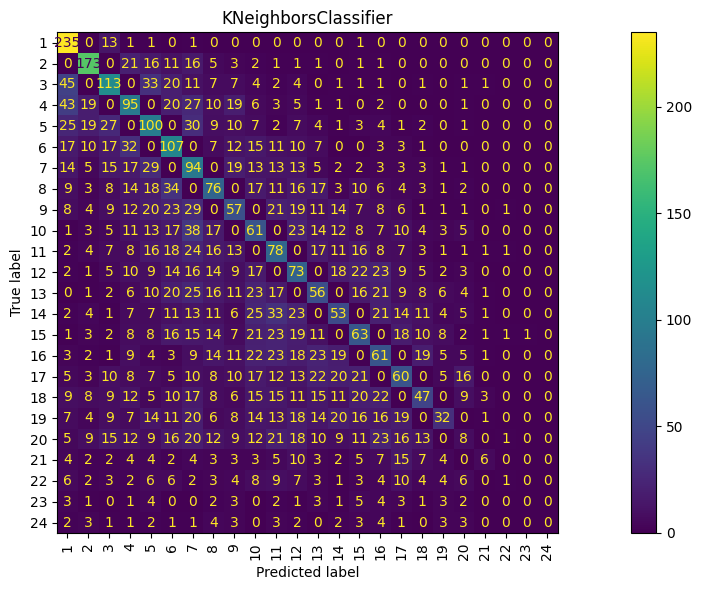

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.26730313037131215
              precision    recall  f1-score   support

           1       0.50      0.84      0.63       252
           2       0.47      0.67      0.55       252
           3       0.30      0.41      0.35       252
           4       0.34      0.36      0.35       252
           5       0.20      0.26      0.23       252
           6       0.20      0.36      0.26       252
           7       0.22      0.30      0.25       252
           8       0.25      0.25      0.25       252
           9       0.21      0.25      0.23       252
          10       0.18      0.23      0.20       252
          11       0.20      0.23      0.21       252
          12       0.20      0.21      0.21       252
          13       0.22      0.22      0.22       252
          14       0.21      0.19      0.20       252
          15       0.29      0.21      0.25       252
 

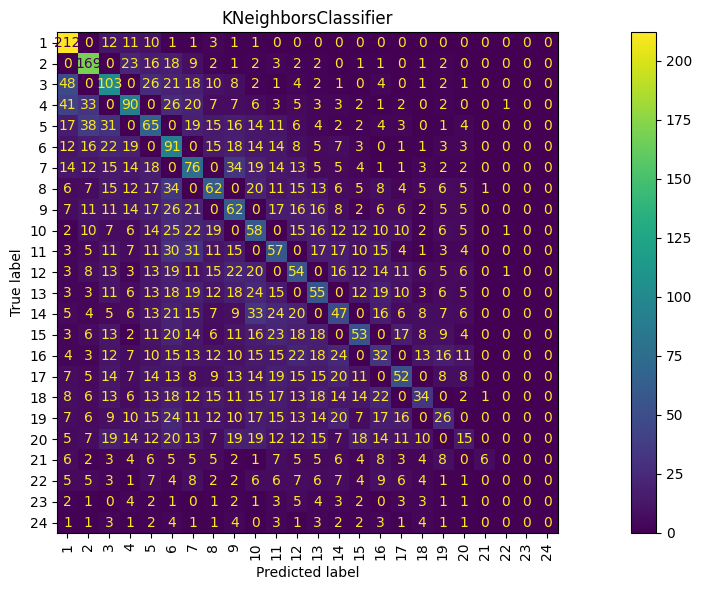

In [4]:
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35429440088531006
              precision    recall  f1-score   support

           1       0.70      0.86      0.77       252
           2       0.65      0.77      0.71       252
           3       0.46      0.63      0.54       252
           4       0.42      0.56      0.48       252
           5       0.38      0.38      0.38       252
           6       0.46      0.40      0.43       252
           7       0.23      0.35      0.28       252
           8       0.36      0.35      0.35       252
           9       0.18      0.28      0.22       252
          10       0.46      0.30      0.36       252
          11       0.21      0.30      0.25       252
          12       0.20      0.35      0.25       252
          13       0.34      0.20      0.25       252
          14       0.57      0.31      0.40       252
          15       0.18      0.32      0.23       252
          16       0.4

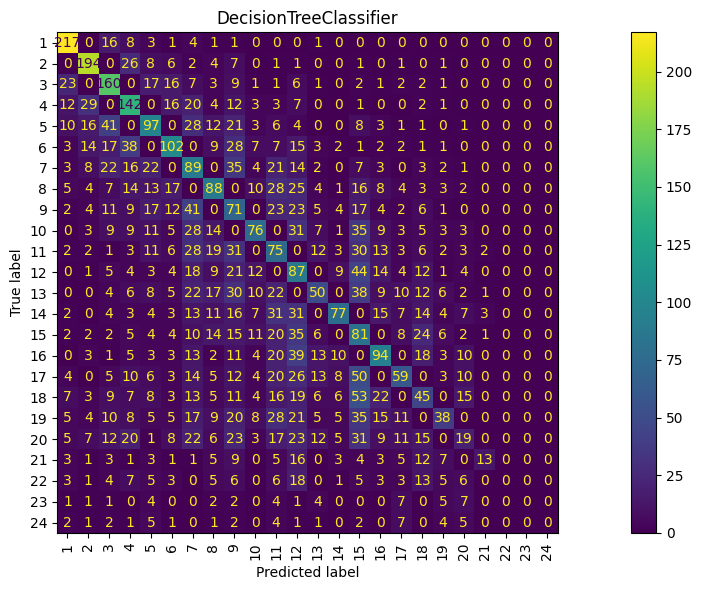

In [5]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "q1",
        "q2",
        "q3",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3383750088295543
              precision    recall  f1-score   support

           1       0.69      0.83      0.75       252
           2       0.58      0.70      0.64       252
           3       0.52      0.60      0.56       252
           4       0.38      0.52      0.44       252
           5       0.36      0.38      0.37       252
           6       0.41      0.41      0.41       252
           7       0.22      0.37      0.28       252
           8       0.37      0.29      0.33       252
           9       0.21      0.26      0.23       252
          10       0.31      0.27      0.29       252
          11       0.24      0.38      0.29       252
          12       0.17      0.38      0.24       252
          13       0.41      0.25      0.31       252
          14       0.31      0.26      0.29       252
          15       0.19      0.23      0.21       252
          16       0.35

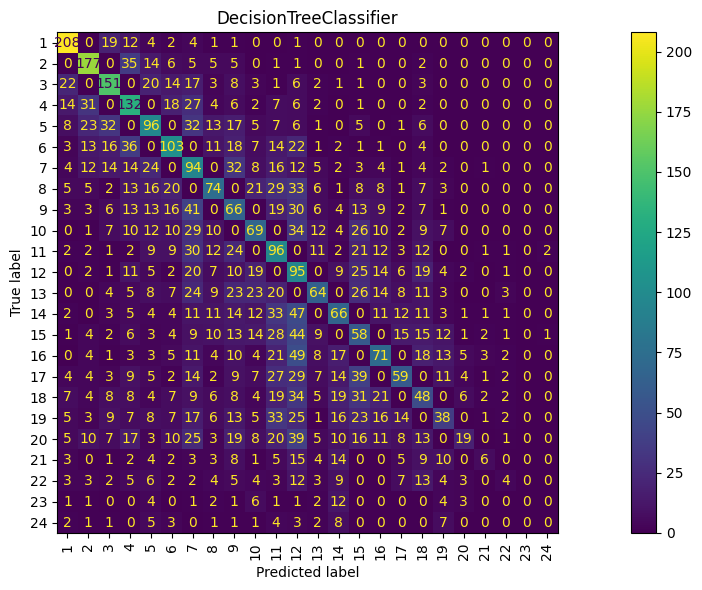

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35214917868326956
              precision    recall  f1-score   support

           1       0.60      0.92      0.73       252
           2       0.61      0.79      0.69       252
           3       0.48      0.65      0.55       252
           4       0.39      0.51      0.44       252
           5       0.41      0.42      0.41       252
           6       0.26      0.35      0.30       252
           7       0.28      0.33      0.30       252
           8       0.37      0.27      0.31       252
           9       0.22      0.22      0.22       252
          10       0.38      0.27      0.31       252
          11       0.29      0.33      0.31       252
          12       0.20      0.36      0.26       252
          13       0.40      0.34      0.37       252
          14       0.22      0.24      0.23       252
          15       0.34      0.32      0.33       252
    

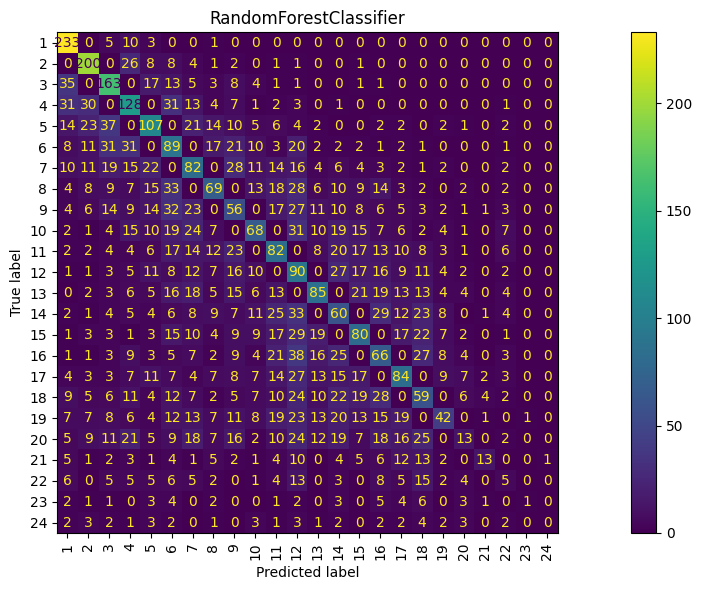

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNationality",
        "constructorNationality",
        "grandPrix",
        "circuitRef",
        "driverWins",
        "constructorWins",
        "q1",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3438032127804855
              precision    recall  f1-score   support

           1       0.56      0.95      0.70       252
           2       0.62      0.79      0.70       252
           3       0.47      0.59      0.52       252
           4       0.38      0.53      0.44       252
           5       0.38      0.41      0.39       252
           6       0.27      0.39      0.32       252
           7       0.31      0.35      0.33       252
           8       0.38      0.27      0.32       252
           9       0.21      0.17      0.19       252
          10       0.26      0.21      0.23       252
          11       0.22      0.26      0.24       252
          12       0.25      0.37      0.30       252
          13       0.25      0.30      0.27       252
          14       0.28      0.25      0.26       252
          15       0.41      0.29      0.34       252
     

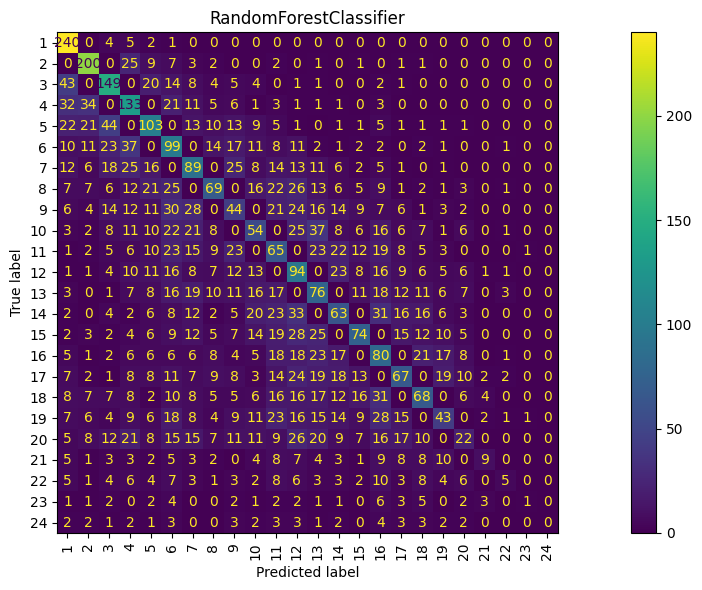

In [8]:
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3615928663087754
              precision    recall  f1-score   support

           1       0.61      0.94      0.74       252
           2       0.65      0.78      0.71       252
           3       0.52      0.54      0.53       252
           4       0.48      0.55      0.51       252
           5       0.34      0.48      0.40       252
           6       0.34      0.50      0.41       252
           7       0.35      0.38      0.36       252
           8       0.38      0.32      0.34       252
           9       0.23      0.30      0.26       252
          10       0.42      0.36      0.39       252
          11       0.17      0.29      0.22       252
          12       0.27      0.31      0.29       252
          13       0.34      0.20      0.25       252
          14       0.76      0.27      0.40       252
          15       0.18      0.28      0.22

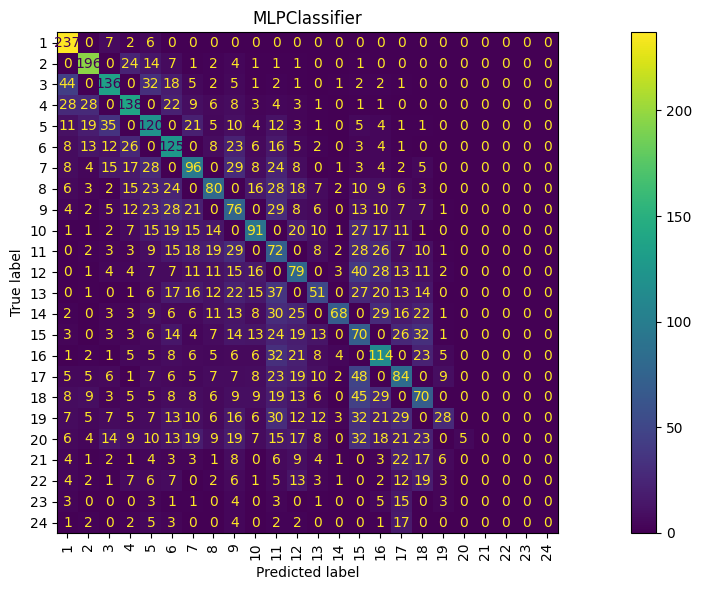

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "circuitRef",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "driverAgeToday",
        "driverAgeAtRace",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3607489375103011
              precision    recall  f1-score   support

           1       0.63      0.92      0.75       252
           2       0.61      0.77      0.68       252
           3       0.57      0.56      0.56       252
           4       0.43      0.52      0.47       252
           5       0.37      0.49      0.42       252
           6       0.31      0.47      0.37       252
           7       0.30      0.40      0.34       252
           8       0.32      0.25      0.28       252
           9       0.27      0.22      0.24       252
          10       0.39      0.32      0.35       252
          11       0.16      0.29      0.20       252
          12       0.37      0.38      0.38       252
          13       0.19      0.24      0.21       252
          14       0.65      0.32      0.43       252
          15       0.20      0.31      0.25

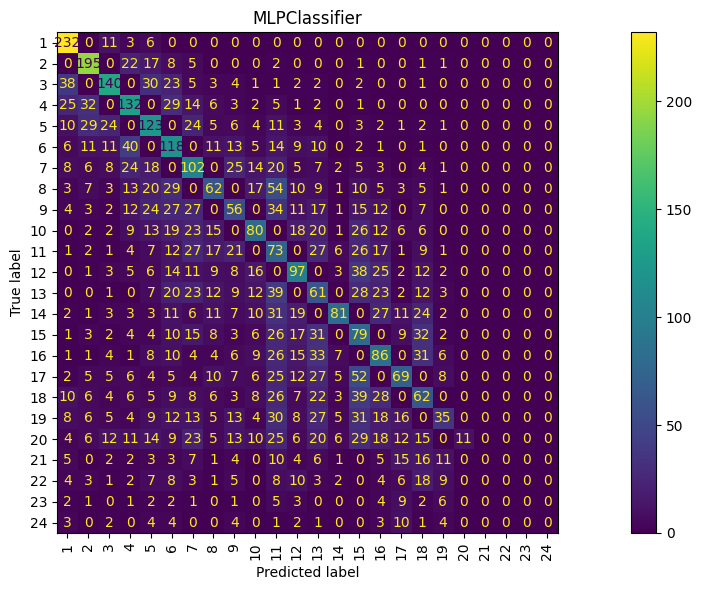

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has not improved.

With all attributes, we have smoothly improved the performance of the model, except in knn since it is a model that is highly dependent on dimensionality (the others may discriminate attributes or give them less importance). Attribute selection could be done to improve knn, but the only significant improvement would be in this one, and it probably won't outperform the others.
